In [1]:
import pandas as pd
data = pd.read_csv("Hamspam.csv",encoding = "ISO-8859-1")

In [2]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [3]:
data.shape

(5559, 2)

In [4]:
data.isnull().sum()

type    0
text    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [6]:
data['type'].value_counts()

ham     4812
spam     747
Name: type, dtype: int64

# Data Cleaning

In [7]:
import re #regular expression
import string

def clean_text(text):
    '''
    Make text lowercase, remove text in square brackets,
    remove punctuation and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    
    return text

clean = lambda x: clean_text(x)

In [12]:
'''
sampleText = 'my name + is don ++ and ? and \ you'
sampleText = re.sub('[+?*]', '', sampleText)
sampleText
'''

"\nsampleText = 'my name + is don ++ and ? and \\ you'\nsampleText = re.sub('[+?*]', '', sampleText)\nsampleText\n"

In [8]:
data['text'] = data['text'].apply(clean)
data

,type,text
0,ham,hope you are having a good week just checking in
1,ham,kgive back my thanks
2,ham,am also doing in cbe only but have to pay
3,spam,complimentary star ibiza holiday or å£ cash n...
4,spam,okmail dear dave this is your final notice to ...
...,...,...
5554,ham,you are a great role model you are giving so m...
5555,ham,awesome i remember the last time we got somebo...
5556,spam,if you dont your prize will go to another cust...
5557,spam,sms ac jsco energy is high but u may not know ...


In [9]:
' '.join(data['text'])

'hope you are having a good week just checking in kgive back my thanks am also doing in cbe only but have to pay complimentary  star ibiza holiday or å£ cash needs your urgent collection  now from landline not to lose out  okmail dear dave this is your final notice to collect your  tenerife holiday or  cash award call  from landline tcs sae    aiya we discuss later lar pick u up at  is it are you this much buzy please ask mummy to call father marvel mobile play the official ultimate spiderman game å£ on ur mobile right now text spider to  for the game  we ll send u a free  wallpaper fyi im at usf now swing by the room whenever sure thing big man i have hockey elections at  shouldn\x89ââèït go on longer than an hour though i anything lor by march ending i should be ready but will call you for sure the problem is that my capital never complete how far with you hows work and the ladies hmm well night night  k ill be sure to get up before noon and see whats what ha ha cool cool chikku chik

In [10]:
' '.join(data['text']).split()

['hope',
 'you',
 'are',
 'having',
 'a',
 'good',
 'week',
 'just',
 'checking',
 'in',
 'kgive',
 'back',
 'my',
 'thanks',
 'am',
 'also',
 'doing',
 'in',
 'cbe',
 'only',
 'but',
 'have',
 'to',
 'pay',
 'complimentary',
 'star',
 'ibiza',
 'holiday',
 'or',
 'å£',
 'cash',
 'needs',
 'your',
 'urgent',
 'collection',
 'now',
 'from',
 'landline',
 'not',
 'to',
 'lose',
 'out',
 'okmail',
 'dear',
 'dave',
 'this',
 'is',
 'your',
 'final',
 'notice',
 'to',
 'collect',
 'your',
 'tenerife',
 'holiday',
 'or',
 'cash',
 'award',
 'call',
 'from',
 'landline',
 'tcs',
 'sae',
 'aiya',
 'we',
 'discuss',
 'later',
 'lar',
 'pick',
 'u',
 'up',
 'at',
 'is',
 'it',
 'are',
 'you',
 'this',
 'much',
 'buzy',
 'please',
 'ask',
 'mummy',
 'to',
 'call',
 'father',
 'marvel',
 'mobile',
 'play',
 'the',
 'official',
 'ultimate',
 'spiderman',
 'game',
 'å£',
 'on',
 'ur',
 'mobile',
 'right',
 'now',
 'text',
 'spider',
 'to',
 'for',
 'the',
 'game',
 'we',
 'll',
 'send',
 'u',
 'a',

In [11]:
pd.Series(' '.join(data['text']).split())

0          hope
1           you
2           are
3        having
4             a
          ...  
81152      call
81153       now
81154      dear
81155    having
81156      food
Length: 81157, dtype: object

In [12]:
pd.Series(' '.join(data['text']).split()).value_counts()

to            2243
i             2228
you           2118
a             1437
the           1323
              ... 
kilos            1
problembut       1
goodno           1
retard           1
wquestion        1
Length: 8305, dtype: int64

In [13]:
#Word frequency
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq

to      2243
i       2228
you     2118
a       1437
the     1323
u       1298
and      965
is       892
in       886
me       789
my       753
for      709
your     659
of       619
it       616
call     577
have     575
on       534
that     509
are      490
dtype: int64

In [11]:
#removing stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...
...,...,...
5554,ham,great role model giving much really wish day m...
5555,ham,awesome remember last time got somebody high f...
5556,spam,dont prize go another customer tc wwwtcbiz pol...
5557,spam,sms ac jsco energy high u may know ur leadersh...


In [15]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

u       1298
call     577
im       462
ur       389
get      384
å£       293
dont     287
go       282
ok       278
free     275
know     257
like     244
ill      239
got      239
good     236
come     228
time     214
day      203
love     197
send     191
dtype: int64

In [16]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(min_df = 1, max_df = 5)

X = vectorizer.fit_transform(data["text"])
X

<5559x6820 sparse matrix of type '<class 'numpy.int64'>'
	with 10989 stored elements in Compressed Sparse Row format>

In [17]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(),
                             'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df

,term,occurrences
0,aa,1
1,aah,3
2,aaniye,1
3,aaooooright,1
4,aathilove,3
...,...,...
6815,ûªscool,1
6816,ûªve,2
6817,ûïharry,1
6818,ûïits,1


In [18]:
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

#print(word_freq_df.sort('occurrences',ascending = False).head())

In [19]:
word_freq_df #.head(30)

,term,occurrences,frequency
0,aa,1,0.000089
1,aah,3,0.000266
2,aaniye,1,0.000089
3,aaooooright,1,0.000089
4,aathilove,3,0.000266
...,...,...,...
6815,ûªscool,1,0.000089
6816,ûªve,2,0.000177
6817,ûïharry,1,0.000089
6818,ûïits,1,0.000089


In [20]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
                             max_features= 1000,
                             max_df = 0.5,
                             smooth_idf=True) #keep top 1000 words

doc_vec = vectorizer.fit_transform(data["text"])
doc_vec

<5559x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 26703 stored elements in Compressed Sparse Row format>

In [21]:
names_features = vectorizer.get_feature_names()
names_features

['abiola',
 'able',
 'abt',
 'accept',
 'access',
 'account',
 'actually',
 'add',
 'address',
 'admirer',
 'aft',
 'afternoon',
 'age',
 'ago',
 'ah',
 'aha',
 'aight',
 'aint',
 'alright',
 'angry',
 'ans',
 'answer',
 'anymore',
 'anytime',
 'apartment',
 'apply',
 'ard',
 'area',
 'asap',
 'ask',
 'askd',
 'asked',
 'asking',
 'attempt',
 'auction',
 'available',
 'ave',
 'await',
 'awaiting',
 'award',
 'awarded',
 'away',
 'awesome',
 'babe',
 'baby',
 'bad',
 'bak',
 'bank',
 'bath',
 'bathe',
 'battery',
 'bb',
 'bcoz',
 'bday',
 'beautiful',
 'bed',
 'bedroom',
 'believe',
 'best',
 'better',
 'bid',
 'big',
 'birthday',
 'bit',
 'blue',
 'bluetooth',
 'bonus',
 'book',
 'booked',
 'bored',
 'boss',
 'bout',
 'box',
 'boy',
 'boytoy',
 'break',
 'bring',
 'brings',
 'brother',
 'bslvyl',
 'bt',
 'btnationalrate',
 'bus',
 'busy',
 'buy',
 'buying',
 'called',
 'caller',
 'callertune',
 'calling',
 'calls',
 'camcorder',
 'came',
 'camera',
 'cancel',
 'car',
 'card',
 'care',


In [22]:
dense = doc_vec.todense()
dense

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
denselist = dense.tolist()

In [24]:
df = pd.DataFrame(denselist, columns = names_features)
df

,abiola,able,abt,accept,access,account,actually,add,address,admirer,...,youve,yr,yrs,yup,ââ,ââèïs,ââèït,ûªs,ûªt,ûï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

In [25]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
                            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
top2_words = get_top_n2_words(data["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,please call,53
1,call later,50
2,ill call,48
3,let know,40
4,sorry ill,39
5,dont know,38
6,good morning,30
7,po box,28
8,call landline,25
9,take care,24


[Text(0, 0, 'please call'),
 Text(1, 0, 'call later'),
 Text(2, 0, 'ill call'),
 Text(3, 0, 'let know'),
 Text(4, 0, 'sorry ill'),
 Text(5, 0, 'dont know'),
 Text(6, 0, 'good morning'),
 Text(7, 0, 'po box'),
 Text(8, 0, 'call landline'),
 Text(9, 0, 'take care'),
 Text(10, 0, 'im going'),
 Text(11, 0, 'guaranteed call'),
 Text(12, 0, 'new year'),
 Text(13, 0, 'prize guaranteed'),
 Text(14, 0, 'ok lor'),
 Text(15, 0, 'pls send'),
 Text(16, 0, 'every week'),
 Text(17, 0, 'send stop'),
 Text(18, 0, 'good night'),
 Text(19, 0, 'im gonna')]

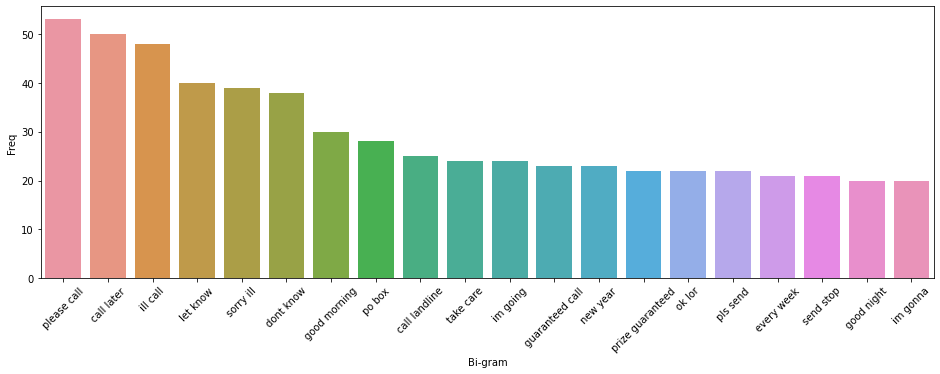

In [29]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram = top2_df.iloc[0:20,:]

fig = plt.figure(figsize = (16, 5))

plot=sns.barplot(x=top20_bigram["Bi-gram"], y=top20_bigram["Freq"])

plot.set_xticklabels(rotation=45, labels = top20_bigram["Bi-gram"])

In [30]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [31]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [32]:
top3_df

,Tri-gram,Freq
0,ill call later,42
1,sorry ill call,38
2,prize guaranteed call,21
3,call land line,18
4,happy new year,18
...,...,...
195,said mind go,5
196,mind go bedroom,5
197,go bedroom minute,5
198,bedroom minute ok,5


[Text(0, 0, 'ill call later'),
 Text(1, 0, 'sorry ill call'),
 Text(2, 0, 'prize guaranteed call'),
 Text(3, 0, 'call land line'),
 Text(4, 0, 'happy new year'),
 Text(5, 0, 'private account statement'),
 Text(6, 0, 'guaranteed call land'),
 Text(7, 0, 'call identifier code'),
 Text(8, 0, 'land line claim'),
 Text(9, 0, 'draw shows prize'),
 Text(10, 0, 'shows prize guaranteed'),
 Text(11, 0, 'identifier code expires'),
 Text(12, 0, 'pls send message'),
 Text(13, 0, 'account statement shows'),
 Text(14, 0, 'statement shows unredeemed'),
 Text(15, 0, 'camcorder reply call'),
 Text(16, 0, 'cant pick phone'),
 Text(17, 0, 'pick phone right'),
 Text(18, 0, 'phone right pls'),
 Text(19, 0, 'right pls send')]

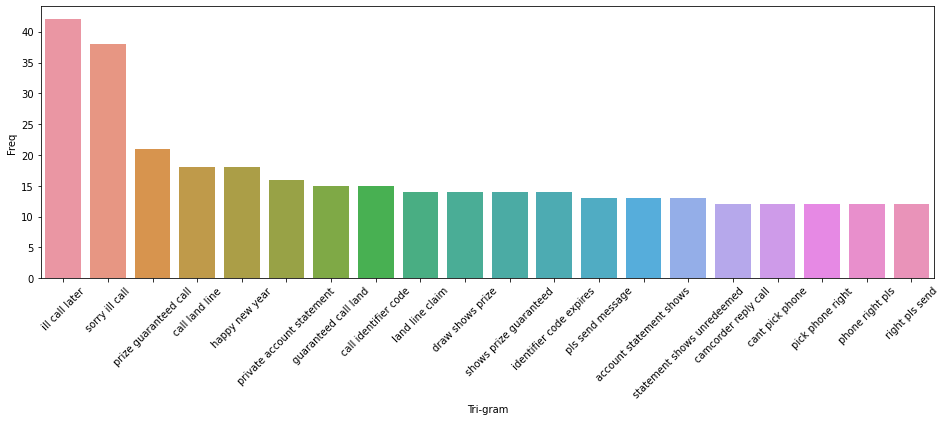

In [33]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (16, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# WordCloud

In [34]:
string_Total = " ".join(data["text"])

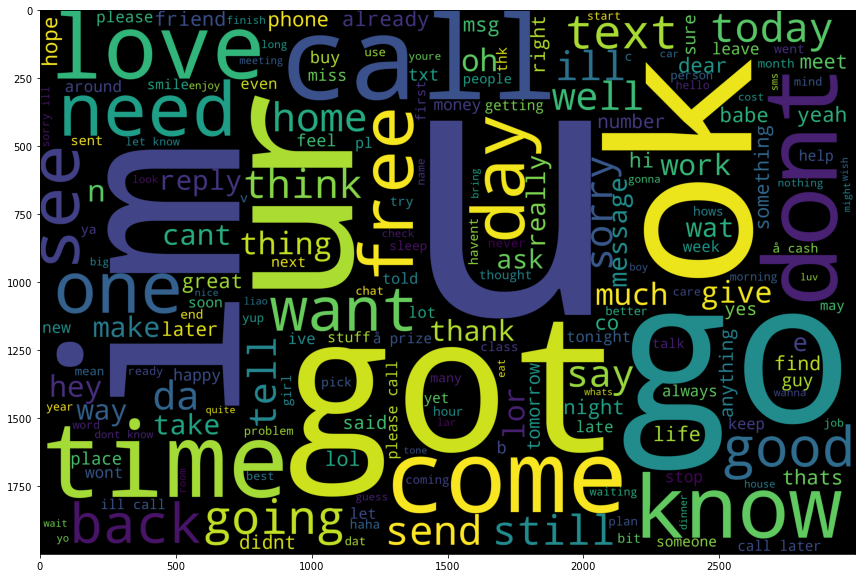

In [35]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color= 'black',
                          width = 3000,
                          height = 2000).generate(string_Total)
plt.figure(figsize = (16,10))
plt.imshow(wordcloud_stw)

# Applying naive bayes for classification

In [36]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...


In [40]:
data.shape

(5559, 2)

In [37]:
def split_into_words(i):
    return (i.split(" "))

In [38]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3)

In [39]:
email_test

,type,text
4641,ham,gud mrng dear hav nice day
3901,ham,housemaid murderer coz man murdered th january...
2242,spam,hi im sue years old work lapdancer love sex te...
2734,ham,said okay sorry
4596,ham,great office today
...,...,...
4669,spam,get free mobile video player free movie collec...
4260,ham,hey sat going intro pilates kickboxing
2505,ham,hey babe hows going ever figure going new years
3252,ham,ok vldo u know got adsense approved


In [41]:
# Preparing email texts into word count matrix format 
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data['text'])
emails_bow

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]


#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0
#  1          1        0        0       1       1    

CountVectorizer(analyzer=<function split_into_words at 0x000002112330BCA0>)

# New Section

In [44]:
# For all messages
all_emails_matrix = emails_bow.transform(data['text'])
all_emails_matrix.shape 

(5559, 8175)

In [45]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train['text'])
train_emails_matrix.shape # (3891,8175)

(3891, 8175)

In [48]:
# For testing messages
test_emails_matrix = emails_bow.transform(email_test['text'])
test_emails_matrix.shape # (1668,8175)

(1668, 8175)

In [49]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
# Multinomial Naive Bayes

# Model Train
classifier_mb = MB()

'''
X = train_emails_matrix
Y = email_train.type

classifier_mb.fit(X, Y)
'''

classifier_mb.fit(train_emails_matrix, email_train['type'])

# Model Test

# Model Accuracy on train set
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 98%

# Model Accuracy on test set
test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%

In [50]:
accuracy_train_m

0.9902338730403495

In [51]:
test_pred_m

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [52]:
accuracy_test_m

0.9664268585131894

In [53]:
from sklearn.naive_bayes import GaussianNB as GB
# Gaussian Naive Bayes

# Model Train
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(), email_train['type'])

# Model Test
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())

# Model Accuracy
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 98%

test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 96%

In [54]:
test_pred_g

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [55]:
accuracy_train_g

0.9470573117450527

In [56]:
accuracy_test_g

0.8830935251798561

# Using TFIDF

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape #  (1668, 6661)

(1668, 8175)

In [58]:
test_tfidf

<1668x8175 sparse matrix of type '<class 'numpy.float64'>'
	with 13831 stored elements in Compressed Sparse Row format>

In [59]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 96%

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%

In [60]:
test_pred_m

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [61]:
accuracy_train_m

0.9701876124389617

In [62]:
accuracy_test_m

0.9610311750599521

In [63]:
from sklearn.naive_bayes import GaussianNB as GB
# Gaussian Naive Bayes

# Model Train
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.type)

# Model Test
train_pred_g = classifier_gb.predict(train_tfidf.toarray())

# Model Accuracy
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 98%

test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 96%

In [64]:
test_pred_g

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [65]:
accuracy_train_g

0.9470573117450527

In [66]:
accuracy_test_g

0.8812949640287769